In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
DATA_IN_PATH='./data_in/'
print("file size : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_IN_PATH+file)/1000000,2))+'MB')

file size : 
ratings.txt                   19.72MB
ratings_test.txt              4.94MB
ratings_train.txt             14.78MB


In [3]:
train_data = pd.read_csv(DATA_IN_PATH+'ratings_train.txt',header=0,delimiter='\t',quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# 데이터 파악하기

In [4]:
print("data count : {}".format(len(train_data)))

# 리뷰 길이
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

data count : 150000


0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

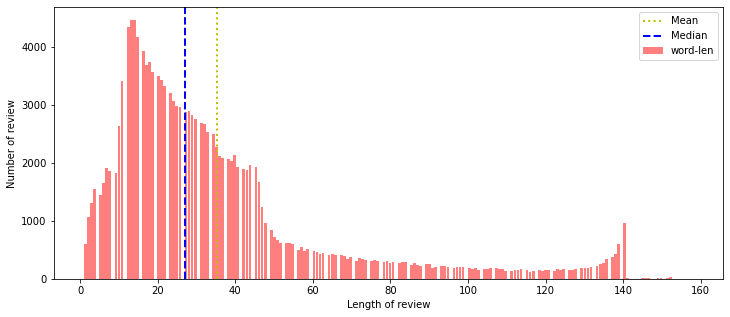

In [5]:
# 리뷰 길이를 히스토그램으로 나타내기
plt.figure(figsize=(12,5))
plt.hist(train_length,bins=200,alpha=0.5,color='r',label='word-len',rwidth=0.9)
plt.axvline(np.mean(train_length),color='y',linestyle='dotted',linewidth=2,label="Mean")
plt.axvline(np.median(train_length),color='b',linestyle='dashed',linewidth=2,label="Median")
plt.xlabel("Length of review")
plt.ylabel("Number of review")
plt.legend()
plt.show()
#plt.yscale('log',nonpositive='clip')

In [6]:
print("Max Length : {}".format(np.max(train_length)))
print("Min Length : {}".format(np.min(train_length)))
print("Avg Length : {:.2f}".format(np.mean(train_length)))
print("Standard Deviation of Length : {:.2f}".format(np.std(train_length)))
print("Median Length : {}".format(np.median(train_length)))

print("25 percentile : {}".format(np.percentile(train_length,25)))
print("75 percentile : {}".format(np.percentile(train_length,75)))

Max Length : 158
Min Length : 1
Avg Length : 35.24
Standard Deviation of Length : 29.58
Median Length : 27.0
25 percentile : 16.0
75 percentile : 42.0


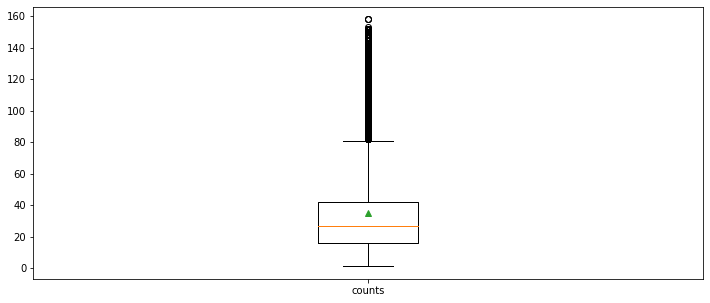

In [7]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length,labels=['counts'],showmeans=True)
plt.show()

In [8]:
train_review = [review for review in train_data['document'] if type(review) is str ]

In [9]:
wordcloud = WordCloud(font_path=DATA_IN_PATH+'NanumGothic.ttf').generate(' '.join(train_review))

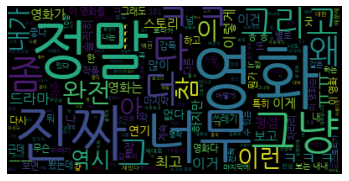

In [10]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

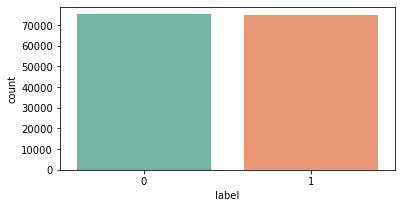

In [11]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=train_data['label'],ax=axe,palette='Set2')
plt.show()

In [12]:
print("Positive Review Count : {}".format(train_data['label'].value_counts()[1]))
print("Negative Review Count : {}".format(train_data['label'].value_counts()[0]))

Positive Review Count : 74827
Negative Review Count : 75173


In [13]:
# 리뷰문장을 단어로 나누기
train_word_counts = train_data['document'].astype(str).apply(lambda x : len(x.split(' ')))
train_word_counts.head()

0     5
1     4
2     1
3     6
4    11
Name: document, dtype: int64

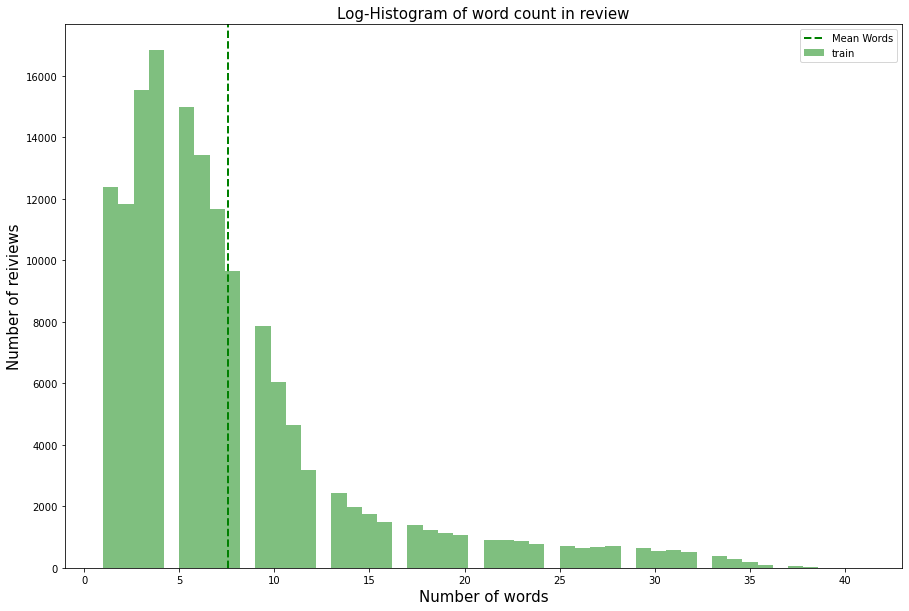

In [14]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='g',label='train',alpha=0.5)
plt.title('Log-Histogram of word count in review',fontsize=15)
#plt.yscale('log',nonpositive='clip')
plt.legend()
plt.axvline(np.mean(train_word_counts),color='g',label="Mean Words",linestyle='dashed',linewidth=2)
plt.xlabel('Number of words',fontsize=15)
plt.ylabel('Number of reiviews',fontsize=15)
plt.legend()
plt.show()

In [15]:
print("Max Words : {}".format(np.max(train_word_counts)))
print("Min Words : {}".format(np.min(train_word_counts)))
print("Avg Words : {:.2f}".format(np.mean(train_word_counts)))
print("Standard Deviation of Words : {:.2f}".format(np.std(train_word_counts)))
print("Median Words : {}".format(np.median(train_word_counts)))

print("25 percentile : {}".format(np.percentile(train_word_counts,25)))
print("75 percentile : {}".format(np.percentile(train_word_counts,75)))

Max Words : 41
Min Words : 1
Avg Words : 7.58
Standard Deviation of Words : 6.51
Median Words : 6.0
25 percentile : 3.0
75 percentile : 9.0


In [16]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x : "?" in x))
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x : '.' in x))

print("With Q-Mark : {:.2f}%".format(qmarks*100))
print("With F-Stop : {:.2f}%".format(fullstop*100))

With Q-Mark : 8.25%
With F-Stop : 51.76%


# preprocessing

In [2]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

DATA_IN_PATH = './data_in/'
train_data=pd.read_csv(DATA_IN_PATH+'ratings_train.txt',header=0,delimiter='\t',quoting=3)

In [3]:
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

## 특수문자 제거

In [4]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","",train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


## 불용어 제거

###  문장을 단어로 나누기

In [5]:
okt = Okt()
review_text = okt.morphs(review_text,stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


### 불용어 사전 만들어 불요어 제거하기

In [6]:
stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
clean_review = [w for w in review_text if w not in stop_words]
print(clean_review)

['더빙', '진짜', '짜증나다', '목소리']


## 전처리 함수

In [7]:
def preprocessing(review,okt,remove_stopwords=False, stop_words=[]):
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","",review)
    word_review = okt.morphs(review_text,stem=True)
    if remove_stopwords:word_reivew = [token for token in word_review if token not in stop_words]
    return word_review

In [9]:
stop_words=set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
okt = Okt()
clean_train_review=[]

for review in train_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

In [10]:
clean_train_review[:4]

#clean_test_review = [preprocessing(review)]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '한', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '는', '없다', '평점', '조정']]

In [15]:
test_data = pd.read_csv(DATA_IN_PATH+'ratings_test.txt',header=0,delimiter='\t',quoting=3)

clean_test_review=[]
for review in test_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

### 학습데이터와 평가데이터를 인덱스 벡터로 바꾸고 패딩처리

In [16]:
tokenizer =Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
MAX_SEQUENCE_LENGTH = 8

train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
train_labels = np.array(train_data['label'])

test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
test_labels = np.array(test_data['label'])

In [17]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA='nsmc_train_input.npy'
TRAIN_LABEL_DATA='nsmc_train_label.npy'
TEST_INPUT_DATA='nsmc_test_input.npy'
TEST_LABEL_DATA='nsmc_test_label.npy'
DATA_CONFIGS='data_configs.json'

data_configs={}

data_configs['vocab']= word_vocab
data_configs['vocab_size']=len(word_vocab) # padding

In [18]:
import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
np.save(open(DATA_IN_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DATA_IN_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)

np.save(open(DATA_IN_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DATA_IN_PATH+TEST_LABEL_DATA,'wb'),test_labels)

json.dump(data_configs,open(DATA_IN_PATH+DATA_CONFIGS,'w'),ensure_ascii=False)